### 1. Data Preparation:

In [1]:
import pandas as pd
import numpy as np

df=pd.read_excel(r'heart_disease.xlsx', sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


### 2. Exploratory Data Analysis (EDA):

In [2]:
df.shape

(908, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 846 entries, 0 to 905
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       846 non-null    int64  
 1   sex       846 non-null    object 
 2   cp        846 non-null    object 
 3   trestbps  846 non-null    int64  
 4   chol      846 non-null    int64  
 5   fbs       846 non-null    bool   
 6   restecg   846 non-null    object 
 7   thalch    846 non-null    int64  
 8   exang     846 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     846 non-null    object 
 11  thal      846 non-null    object 
 12  num       846 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.7+ KB


In [5]:
df.shape

(846, 13)

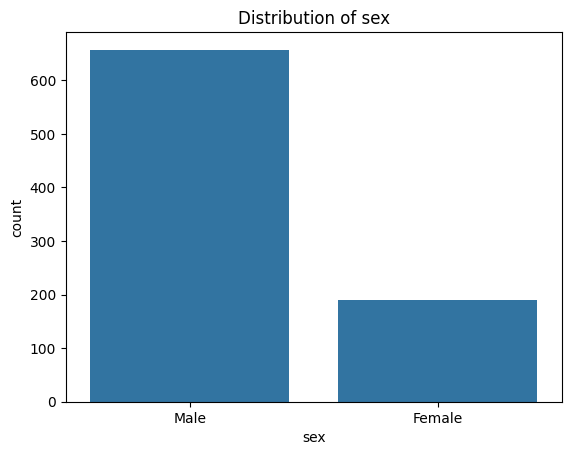

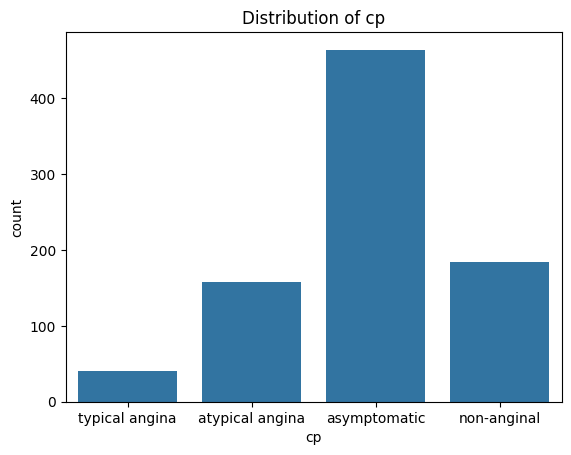

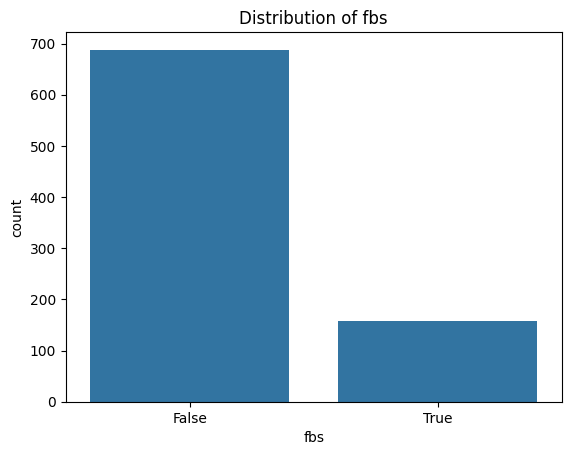

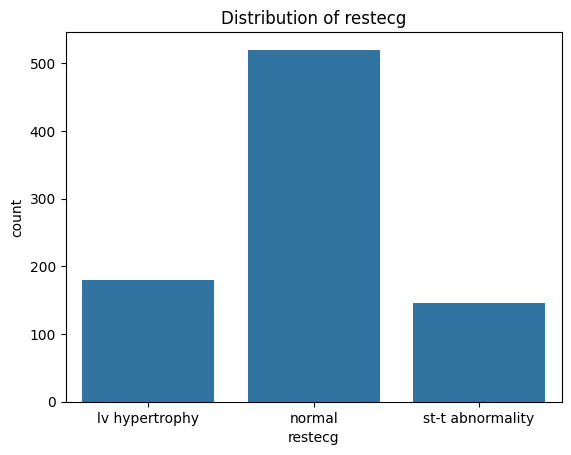

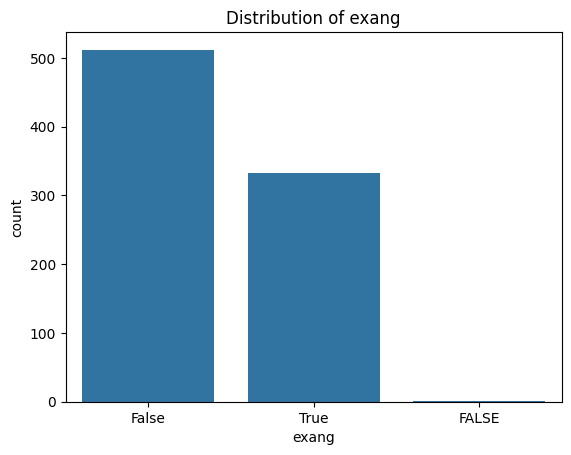

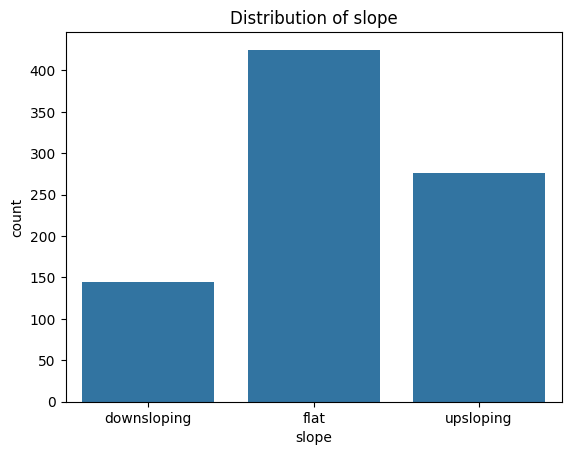

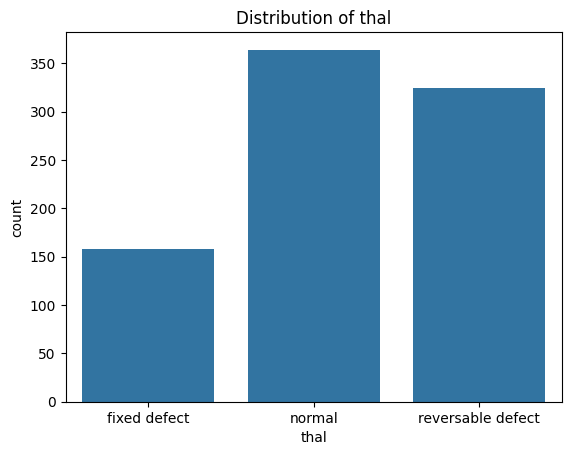

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope',  'thal']

for col in categorical_cols:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()


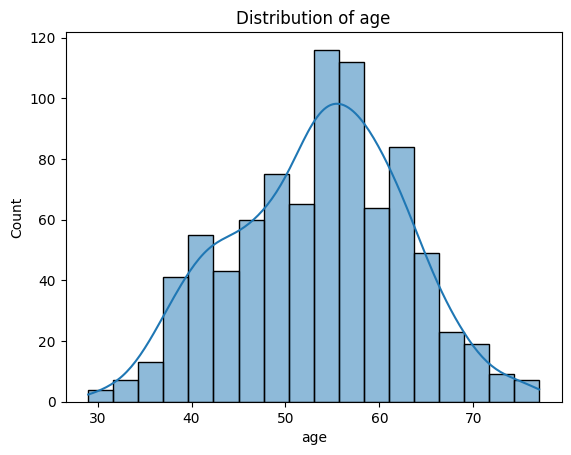

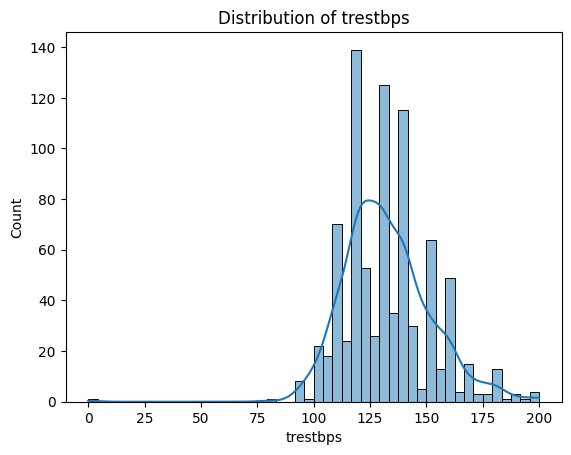

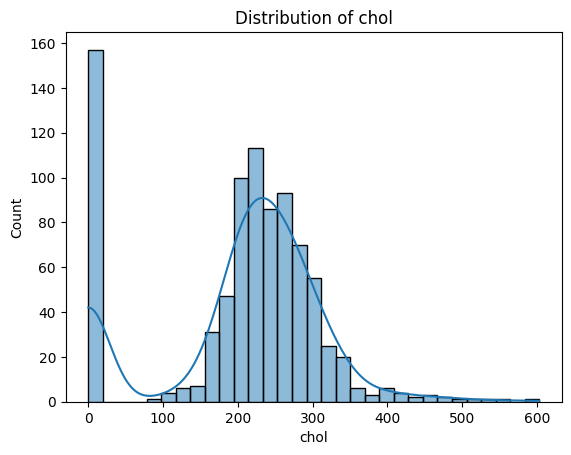

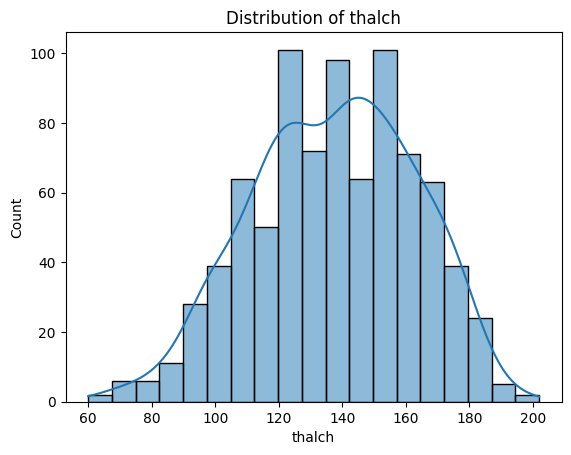

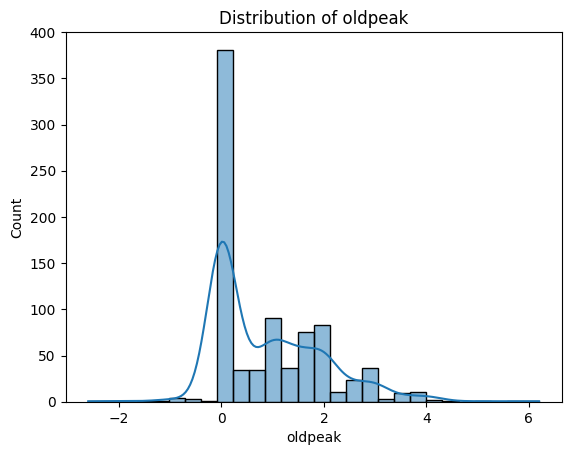

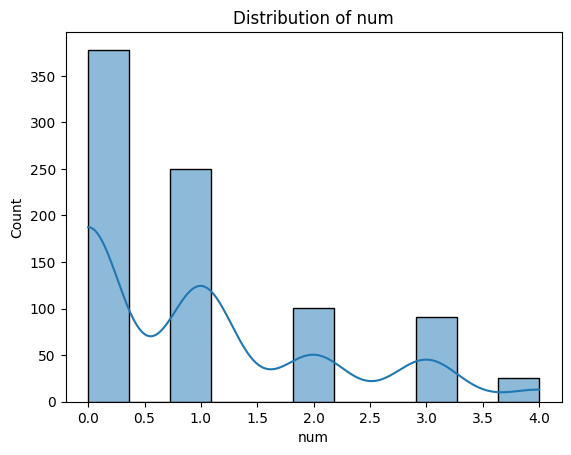

In [7]:


numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']

for col in numerical_cols:
    plt.figure()
    sns.histplot(x=col, data=df, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


### 3. Feature Engineering:

In [8]:
df['exang'] = df['exang'].astype(str).str.title()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,False,0.0,flat,fixed defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,True,3.0,flat,normal,4
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4


In [9]:

for col in df.columns:
  df[col] = df[col].astype(str).str.replace('[^A-Za-z0-9\s]+', '')


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,34,1,3,34,83,1,0,49,0,33,0,0,0
1,12,1,1,28,53,0,1,31,0,10,1,0,0
2,28,1,0,31,42,0,1,47,0,14,1,0,0
3,23,1,3,15,38,0,0,87,0,10,1,0,0
4,28,1,0,8,51,0,1,25,1,25,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,22,1,0,8,0,1,1,110,0,10,1,0,4
902,33,1,0,43,104,1,2,7,1,39,1,1,4
903,24,1,0,20,0,0,1,19,0,25,2,2,4
904,33,1,0,46,23,0,2,19,1,39,1,2,4


### 4. Decision Tree Classification:

In [22]:
from sklearn.model_selection import train_test_split

x=df.drop('num', axis=1)
y=df['num']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=25)


In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
y_pred = dt.predict(x_test)


In [25]:

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5117647058823529


In [26]:
print("Classification report",classification_report(y_test, y_pred))

Classification report               precision    recall  f1-score   support

           0       0.69      0.77      0.73        75
           1       0.48      0.41      0.44        54
           2       0.22      0.20      0.21        20
           3       0.16      0.18      0.17        17
           4       0.00      0.00      0.00         4

    accuracy                           0.51       170
   macro avg       0.31      0.31      0.31       170
weighted avg       0.50      0.51      0.50       170



In [19]:
from sklearn.model_selection import GridSearchCV

parameter={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':range(2,15,1),
    'min_samples_split':range(2,15,1),
     "max_features":['auto','sqrt','log2']
}
cv=GridSearchCV(estimator=dt,param_grid=parameter,cv=5, scoring='accuracy')
cv.fit(x_train,y_train)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 15),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 15),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [33]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_split': 2,
 'splitter': 'best'}

In [59]:
bestModel=DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2', min_samples_split=2, splitter='best')
bestModel.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2')

In [60]:
y_pred=bestModel.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.5588235294117647


In [61]:
print("Classification report",classification_report(y_test, y_pred))

Classification report               precision    recall  f1-score   support

           0       0.71      0.77      0.74        75
           1       0.42      0.69      0.52        54
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         4

    accuracy                           0.56       170
   macro avg       0.23      0.29      0.25       170
weighted avg       0.45      0.56      0.49       170



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


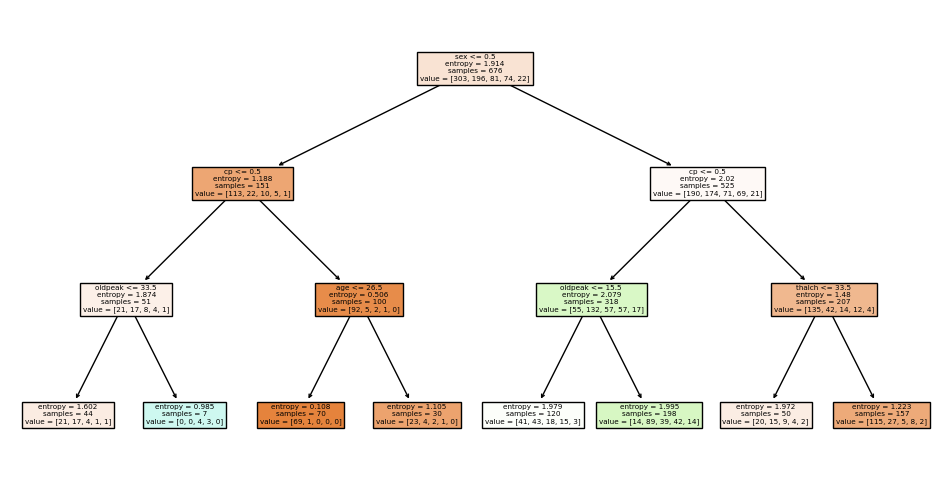

In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(bestModel, filled=True, feature_names=x.columns)
plt.show()





---



---



### Interview Questions:

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Criterion:

Options: "gini" or "entropy".
Effect: Determines the measure of split quality; affects the tree's structure and performance.

Max Depth:

Effect: Limits the tree's depth; prevents overfitting (too deep) or underfitting (too shallow).

Min Samples Split:

Effect: Minimum samples needed to split a node; higher values prevent overfitting.

Min Samples Leaf:

Effect: Minimum samples per leaf node; higher values prevent overfitting.

Max Features:

Effect: Number of features to consider at each split; reducing it can improve generalization.

Max Leaf Nodes:

Effect: Limits the number of leaf nodes; controls tree size to prevent overfitting.

Min Impurity Decrease:

Effect: Node splits must reduce impurity by a certain amount; prevents unnecessary splits.

Class Weight:

Effect: Adjusts weights for imbalanced classes; improves handling of imbalanced datasets.

Splitter:

Options: "best" or "random".
Effect: "Random" introduces more randomness; useful in ensemble methods like Random Forest.

---



2. What is the difference between the Label encoding and One-hot encoding?


Label encoding converts categorical data into numerical form by assigning each category a unique integer value. For example, the categories ["red", "green", "blue"] could be encoded as [0, 1, 2]. This method is simple and efficient for ordinal data where the order of categories matters. However, it can create artificial order relationships in nominal data where no such order exists.

One-hot encoding, on the other hand, creates a binary vector for each category. For the same categories ["red", "green", "blue"], one-hot encoding would produce [[1, 0, 0], [0, 1, 0], [0, 0, 1]]. This method avoids the issue of introducing an artificial order and is suitable for nominal data. However, it can increase the dimensionality of the data, especially when dealing with many categories.